# Tarea Formativa 1

En esta tarea se introduce el análisis de datos con la ayuda de la librería de Python [pandas](https://pandas.pydata.org/docs/). Analizaremos los  [datos de COVID-19](https://github.com/MinCiencia/Datos-COVID19) publicados por el Ministerio de Salud. 

Es importante volver a mencionarles que los contenidos de la ayudantía serán los que se evaluarán. No esperamos que sean expertos en programación, solo que manejen los comandos que les enseñaremos a continuación.

Los objetivos particulares son:

1.   Cargar una base de datos
2.   Graficar datos
3.   Agrupar y operar datos
4.   Calcular indicadores estadísticos
5.   Calcular promedios móviles
6.   Ajustar curvas a los datos
7.   Calcular el error de ajuste de curvas









**Problema 1**

Grafique los casos nuevos y acumulados, **por 100 mil habitantes**, de **5 regiones** distintas. 

**Bonus 1**

En el gráfico de casos nuevos, para una región, incluya los casos nuevos con síntomas, sin síntomas y sin notificar

**Problema 2**

Agrupe los datos de casos acumulados y casos nuevos de todos las regiones y grafique el balance país de los casos de COVID.

**Problema 3**

Calcule algunos indicadores estadísticos como promedio, desviación estándar, máximo, primer y tercer cuartil de los casos nuevos, por 100 mil habitantes, de las 5 regiones elegidas.

**Problema 4**

Calcule el promedio móvil de cada uno de las 5 regiones con un ventana de 7 días de los casos nuevos por cada 100 mil habitantes. ¿Para que puede ser útil calcular promedios móviles?

**Problema 5**

Ajuste una recta a los datos de casos acumulados, desde **inicios de 2021** de las 5 regiones.

**Bonus 2**

Calcule el error de ajuste de las curvas del problema anterior. Para ello utilice la métrica RMSE (*Root Mean Squared Error* o raíz de error cuadrático medio). Comente acerca de las curvas con mejor y peor ajuste.




Recuerde que esta tarea es formativa por lo cual no será evaluada. Sin embargo, si usted la entrega y obtiene 4 puntos o más, obtendrá un bonus de 1 punto de base para la evaluación de la tarea sumativa. También puede realizar los ejercicios bonus para llegar a un total de 1.5 puntos base para la tarea sumtaiva. 

La fecha límite de entrega de la tarea formativa es el **jueves 22 de abril** a las **23:59 hrs**.

## Cargar datos

El ministerio de salud dispuso al público la base de datos completa de pandemia de COVID-19 en Chile. Esta incluye datos de casos, muertes, uso de camas UCI, entre otros.



La función **pd_read_csv** recibe el archivo de datos, por default recibe datos separados por coma. Además, se puede incluir los campo **parse_dates** y **data_parser** con el nombre de la columna de las fechas  y el formato de fechas, respectivamente. Lo anterior es útil para usar los datos de la fechas de forma numérica, por ejemplo, para regresiones (ajustes lineales).

Para esto, será útil saber que un **data frame** es una tabla en la que cada columna contiene valores de un tipo de variable (por ejemplo: Región, categoría, etc), y cada fila contiene un set de valores, uno para cada columna (por ejemplo: Metropolitana, Valparaíso). 


In [ ]:
import pandas as pd
from datetime import datetime


data_path ="https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/"

csv_path = "producto3/TotalesPorRegion_std.csv"

path = data_path + csv_path

print('link de los datos: {}'.format(path))

# Leemos el archivo csv y creamos el data frame con nuestros datos.
data = pd.read_csv(path ,parse_dates=['Fecha'],
                   date_parser=lambda x: datetime.strptime(x, '%Y-%m-%d'))

poblacion_dic = {'Arica y Parinacota':255_068,
                 'Tarapacá': 391_558,
                 'Antofagasta':703_534,
                 'Atacama':316_168,
                 'Coquimbo':848_079,
                 'Valparaíso':1_979_373,
                 'Metropolitana':8_242_459,
                 'O’Higgins':1_000_959,
                 'Maule':1_143_012,
                 'Ñuble':514_609,
                 'Biobío':1_670_590,
                 'Araucanía':1_019_548,
                 'Los Ríos':407_837,
                 'Los Lagos':897_708,
                 'Aysén':107_158,
                 'Magallanes':179_533}
# Fuente: Wikipedia

# Si solo tenemos una serie de datos utilizamos la variable 'Series' de pandas
poblacion = pd.Series(data = poblacion_dic)



link de los datos: https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto3/TotalesPorRegion_std.csv


In [ ]:
data.head() # Visualiza primeras 5 líneas del set de datos

,Region,Categoria,Fecha,Total
0,Arica y Parinacota,Casos acumulados,2020-03-03,0.0
1,Tarapacá,Casos acumulados,2020-03-03,0.0
2,Antofagasta,Casos acumulados,2020-03-03,0.0
3,Atacama,Casos acumulados,2020-03-03,0.0
4,Coquimbo,Casos acumulados,2020-03-03,0.0


In [ ]:
poblacion.head()

Arica y Parinacota    255068
Tarapacá              391558
Antofagasta           703534
Atacama               316168
Coquimbo              848079
dtype: int64

In [ ]:
data['Categoria'].unique()

array(['Casos acumulados', 'Casos nuevos totales',
       'Casos nuevos con sintomas', 'Casos nuevos sin sintomas',
       'Casos nuevos sin notificar', 'Fallecidos totales',
       'Casos confirmados recuperados', 'Casos activos confirmados',
       'Casos activos probables', 'Casos probables acumulados',
       'Casos confirmados por antigeno',
       'Casos nuevos confirmados por antigeno',
       'Casos con sospecha de reinfeccion'], dtype=object)

## Problema 1: Filtrar y visualizar datos (1 punto)

Grafique los casos nuevos y acumulados, **por 100 mil habitantes**, de **5 regiones** distintas. 

**Código ejemplo**: Casos nuevos y acumulados de una región.

In [ ]:
# Para que se vean las fechas y no los índices de posición al graficar indicamos nuestro "eje X" 
# en este caso las fechas de los casos

# Este Código se debe correr UNA VEZ, si lo corren más de una vez les saldrá error
# y deben cargar los datos de nuevo
data.set_index('Fecha', inplace = True)

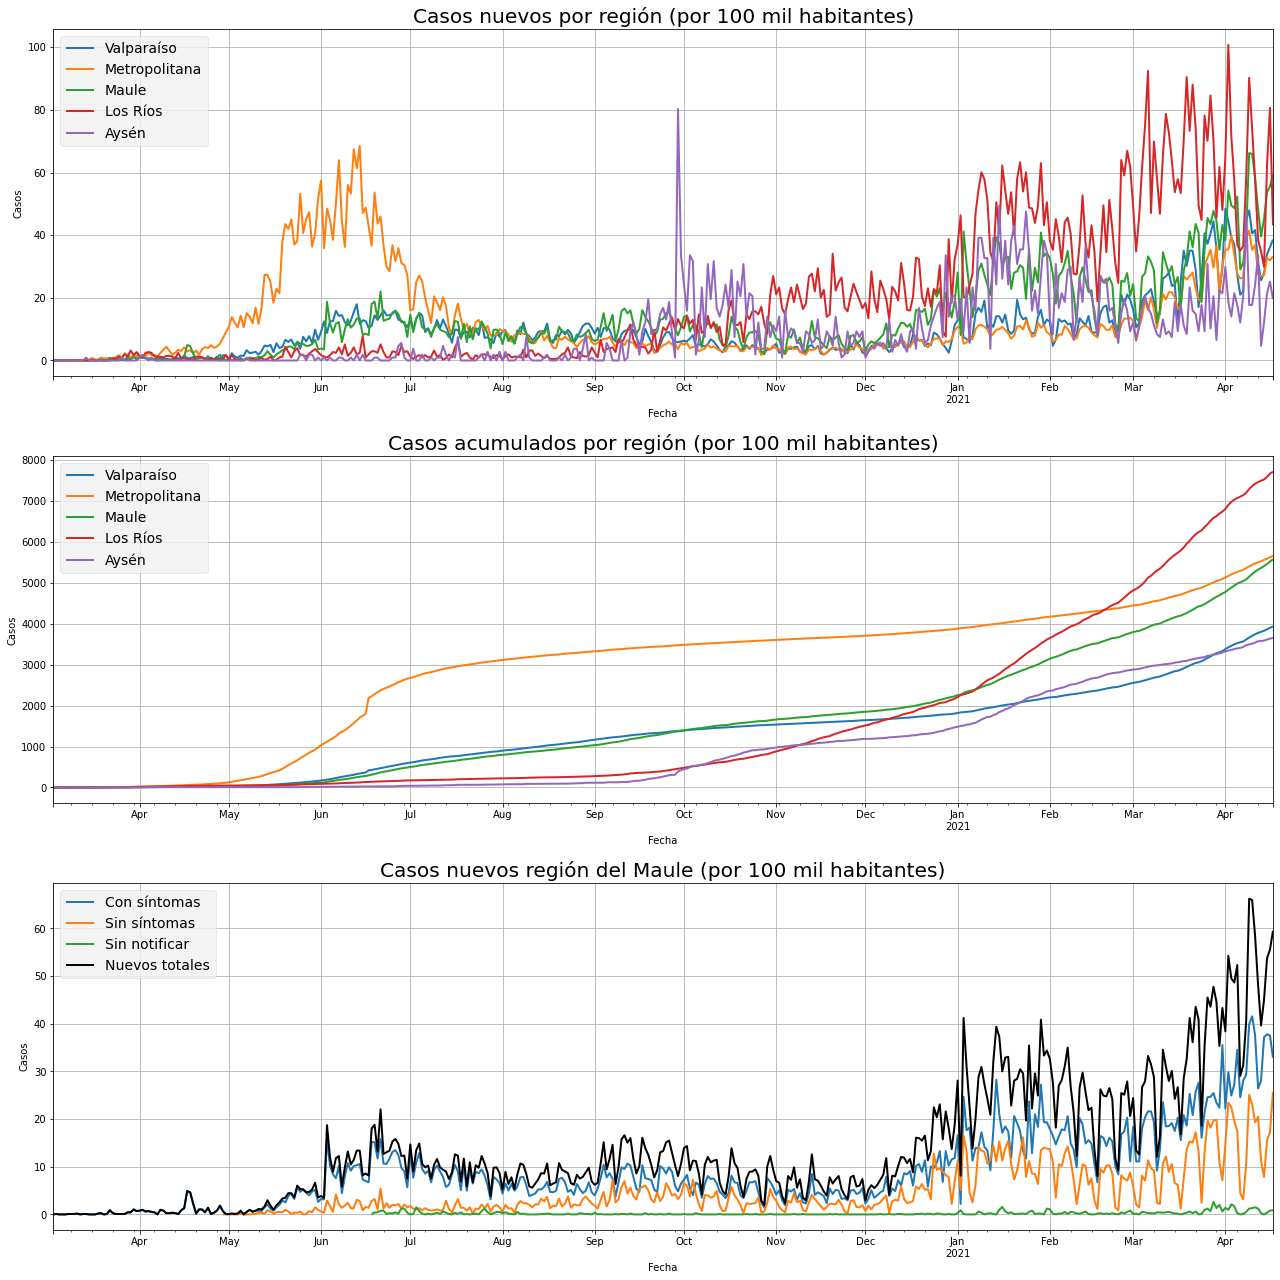

In [ ]:
from matplotlib import pyplot as plt # Para graficar importamos pylot de la librería pyplot de matplotlib

fig, ax = plt.subplots(3,1,figsize=(18,18)); # Creamos una figura con subfiguras, el tamaño (figsize) varia segun cantidad de figuras
plt.style.use('fivethirtyeight')

# Elegimos la región cuyos datos queremos filtrar
regiones = ('Valparaíso','Metropolitana', 'Maule', 'Los Ríos', 'Aysén')

for i in range(len(regiones)):
    region = regiones[i]
    # Buscamos los índices de las filas cuyo país es el elegido
    Indices = data['Region']== region 
    # Filtramos los datos con los índices encontrados
    filtro_region = data[Indices] 
    # Filtramos casos aumulado y casos nuevos.
    filtro_acumulado_totales = filtro_region[filtro_region['Categoria'] == 'Casos acumulados']
    filtro_nuevos_totales = filtro_region[filtro_region['Categoria'] == 'Casos nuevos totales']

    filtro_nuevos_con_sintomas = filtro_region[filtro_region['Categoria'] == 'Casos nuevos con sintomas']
    filtro_nuevos_sin_sintomas = filtro_region[filtro_region['Categoria'] == 'Casos nuevos sin sintomas']
    filtro_nuevos_sin_notificar = filtro_region[filtro_region['Categoria'] == 'Casos nuevos sin notificar']

    # Obtenemos los datos de la columna 'Total'
    Acumulados_totales = filtro_acumulado_totales['Total'] * 100_000 / poblacion[region]
    Nuevos_totales = filtro_nuevos_totales['Total'] * 100_000 / poblacion[region]

    # Graficamos los datos
    Nuevos_totales.plot(ax = ax[0], linewidth = 2, label = region) # Con .plot() se grafica directamente del set de datos de pandas
    
    Acumulados_totales.plot(ax = ax[1], linewidth = 2, label = region)

ax[0].set_title("Casos nuevos por región (por 100 mil habitantes)") # Escojemos un título para el gráfico
ax[0].set_ylabel('Casos') # Nombre para eje Y
ax[0].set_xlabel('Fecha') # Nombre para eje C

ax[1].set_title("Casos acumulados por región (por 100 mil habitantes)")
ax[1].set_ylabel('Casos')
ax[1].set_xlabel('Fecha')

ax[2].set_title("Casos nuevos región del Maule (por 100 mil habitantes)")
ax[2].set_ylabel('Casos')
ax[2].set_xlabel('Fecha')

region = 'Maule'
Indices = data['Region']== region 
# Filtramos los datos con los índices encontrados
filtro_region = data[Indices] 
# Filtramos casos aumulado y casos nuevos.
filtro_acumulado_totales = filtro_region[filtro_region['Categoria'] == 'Casos acumulados']
filtro_nuevos_totales = filtro_region[filtro_region['Categoria'] == 'Casos nuevos totales']

filtro_nuevos_con_sintomas = filtro_region[filtro_region['Categoria'] == 'Casos nuevos con sintomas']
filtro_nuevos_sin_sintomas = filtro_region[filtro_region['Categoria'] == 'Casos nuevos sin sintomas']
filtro_nuevos_sin_notificar = filtro_region[filtro_region['Categoria'] == 'Casos nuevos sin notificar']

Con_sintomas = filtro_nuevos_con_sintomas['Total'] * 100_000 / poblacion[region]
Sin_sintomas = filtro_nuevos_sin_sintomas['Total'] * 100_000 / poblacion[region]
Sin_notificar = filtro_nuevos_sin_notificar['Total'] * 100_000 / poblacion[region]
Nuevos_totales = filtro_nuevos_totales['Total'] * 100_000 / poblacion[region]

Con_sintomas.plot(ax = ax[2], linewidth = 2, label = 'Con síntomas')
Sin_sintomas.plot(ax = ax[2], linewidth = 2, label = 'Sin síntomas')
Sin_notificar.plot(ax = ax[2], linewidth = 2, label = 'Sin notificar')
Nuevos_totales.plot(ax = ax[2], color = '#000000', linewidth = 2, label = 'Nuevos totales') # Con .plot() se grafica directamente del set de datos de pandas

ax[0].legend()
ax[1].legend()
ax[2].legend()
fig.tight_layout() #permite que no se solapen textos de figuras MUY IMPORTANTE
fig.show()

### Bonus (2 décimas)

En el gráfico de casos nuevos, para una región, incluya los casos nuevos con síntomas, sin síntomas y sin notificar

## Problema 2: Agrupar y operar datos (1 punto)

Agrupe los datos de casos acumulados y casos nuevos de todos las regiones y grafique el balance país de los casos de COVID. Para ello:

* Filtre los datos para casos acumulados y casos nuevos

*   Utilice la función [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) para agrupar los datos. Para ello ingrese como argumento la columna con la que quiere agrupar. Por ejemplo, data.groupby('Fecha') agrupa todos los datos para cada fecha del *data frame* data.

*   Luego, sume los casos agrupados para la columna 'Total' para casos nuevos o casos acumulados con .sum().

* **No usar la 'región' Total, la idea es hacer operaciones con los datos**.


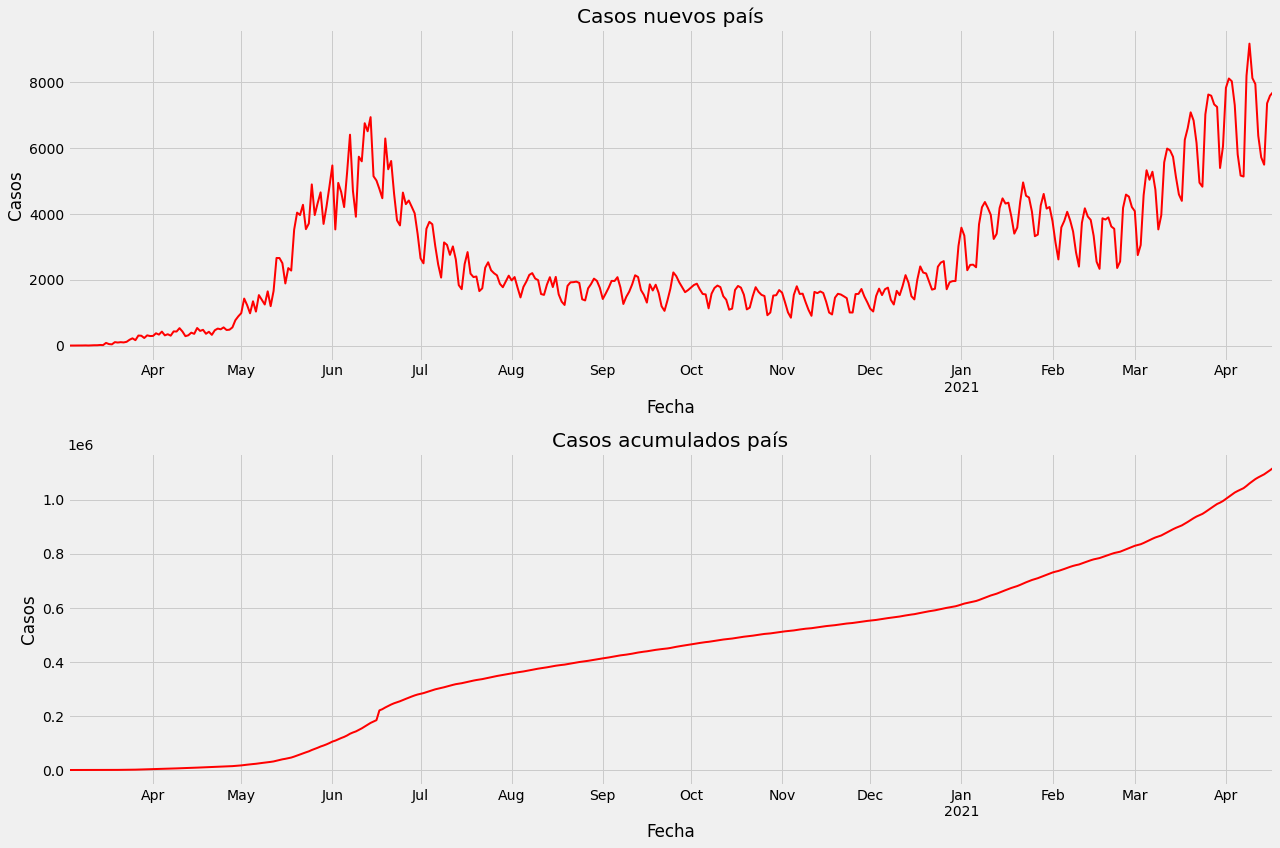

In [ ]:
acumulados = data[data['Categoria'] == 'Casos acumulados']
data_nuevos = data[data['Categoria'] == 'Casos nuevos totales']

pais_acumulado = acumulados.groupby('Fecha')['Total'].sum()/2
pais_nuevos = data_nuevos.groupby('Fecha')['Total'].sum()/2

fig, ax = plt.subplots(2, 1, figsize = (18, 12))
plt.style.use('fivethirtyeight')

pais_nuevos.plot(ax = ax[0], color = '#ff0000', linewidth = 2) # Con .plot() se grafica directamente del set de datos de pandas
ax[0].set_title("Casos nuevos país") # Escojemos un título para el gráfico
ax[0].set_ylabel('Casos') # Nombre para eje Y
ax[0].set_xlabel('Fecha') # Nombre para eje C

pais_acumulado.plot(ax = ax[1], color = '#ff0000', linewidth = 2)
ax[1].set_title("Casos acumulados país")
ax[1].set_ylabel('Casos')
ax[1].set_xlabel('Fecha')

fig.tight_layout()
fig.show()

## Problema 3 : Estadísticos (1 punto)

Calcule algunos indicadores estadísticos como promedio, desviación estándar, máximo, primer y tercer cuartil de los casos nuevos, por 100 mil habitantes, de las 5 regiones elegidas.


**Código ejemplo**: Promedios de una lista  de países






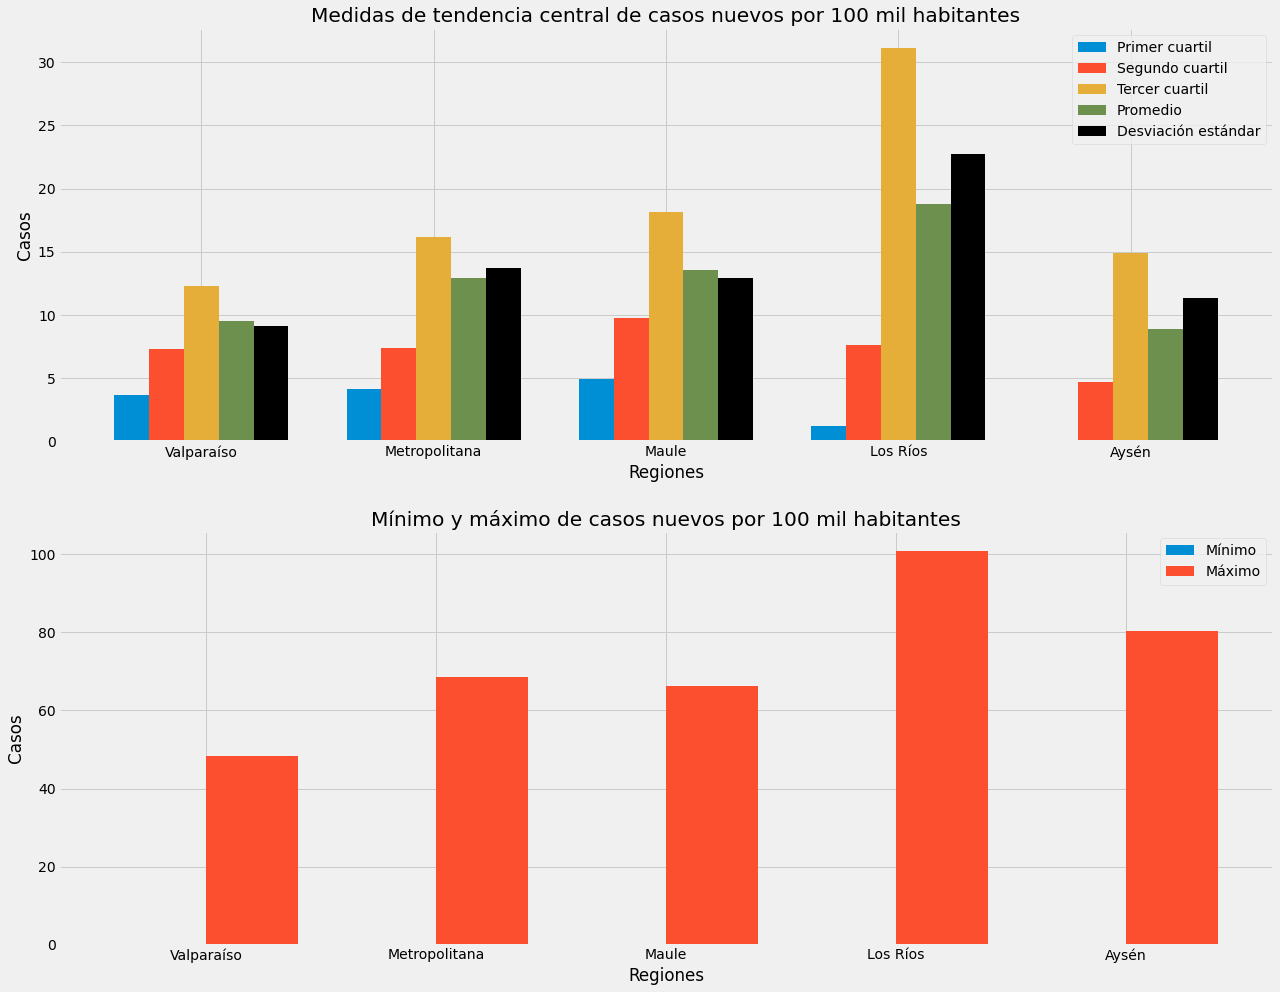

In [ ]:
from matplotlib import pyplot as plt # Para graficar importamos pylot de la librería pyplot de matplotlib
import numpy as np


regiones = ('Valparaíso','Metropolitana', 'Maule', 'Los Ríos', 'Aysén')
indices = np.arange(len(regiones))

promedios = []
desviaciones = []
primer_cuartil = []
segundo_cuartil = []
tercer_cuartil = []
minimos = []
maximos = []

for region in regiones:

  # Buscamos los índices de las filas cuyo país es el elegido
  Indices = data['Region']== region 
  # Filtramos los datos con los índices encontrados
  filtro_region = data[Indices] 
  # Filtramos casos aumulado y casos nuevos.
  filtro_acumulado_totales = filtro_region[filtro_region['Categoria'] == 'Casos acumulados']
  filtro_nuevos_totales = filtro_region [filtro_region['Categoria'] == 'Casos nuevos totales']

  # Obtenemos los datos de la columan 'Total'
  Nuevos_totales_x100mil = filtro_nuevos_totales['Total']* 100_000 / poblacion[region]

  promedios.append(Nuevos_totales_x100mil.mean())
  desviaciones.append(Nuevos_totales_x100mil.std())
  primer_cuartil.append(np.percentile(Nuevos_totales_x100mil, 25))
  segundo_cuartil.append(np.percentile(Nuevos_totales_x100mil, 50))
  tercer_cuartil.append(np.percentile(Nuevos_totales_x100mil, 75))
  minimos.append(Nuevos_totales_x100mil.min())
  maximos.append(Nuevos_totales_x100mil.max())


fig, ax = plt.subplots(2,1,figsize=(18,14))
plt.style.use('fivethirtyeight')

width = 0.15
ax[0].bar(indices - 2 * width, primer_cuartil, width = width, label = 'Primer cuartil')
ax[0].bar(indices - 1 * width, segundo_cuartil, width = width, label = 'Segundo cuartil')
ax[0].bar(indices, tercer_cuartil, width = width, label = 'Tercer cuartil')
ax[0].bar(indices + 1 * width, promedios, width = width, label = 'Promedio')
ax[0].bar(indices + 2 * width, desviaciones, color = '#000000', width = width, label = 'Desviación estándar')

ax[0].set_title('Medidas de tendencia central de casos nuevos por 100 mil habitantes')


ax[0].set_ylabel('Casos')
ax[0].set_xlabel('Regiones')
ax[0].set_xticks(ticks = indices)
ax[0].set_xticklabels(labels = regiones)

width = 0.4
ax[1].bar(indices - 0.5 * width, minimos, width = width, label = 'Mínimo')
ax[1].bar(indices + 0.5 * width, maximos, width = width, label = 'Máximo')
ax[1].set_title('Mínimo y máximo de casos nuevos por 100 mil habitantes')
ax[1].set_ylabel('Casos')
ax[1].set_xlabel('Regiones')
ax[1].set_xticks(ticks = indices)
ax[1].set_xticklabels(labels = regiones)


ax[0].legend()
ax[1].legend()

fig.tight_layout(h_pad = 2)

fig.show()




## Problema 4: Promedios móviles (2 puntos)

Calcule el promedio móvil de cada uno de las 5 regiones con un ventana de 7 días de los casos nuevos por cada 100 mil habitantes. ¿Para que puede ser útil calcular promedios móviles?

Para calcular el promedio dentro de una ventana de datos utilizamos la función [.rolling](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) de pandas. En ella indicamos el tamaño de la ventana para agrupar los datos y luego calculamos el promedio con .mean().

Usando los estadísticos del problema 3 y los  gráficos de promedios móviles, **interprete**  y **compare** sus resultados (Considere análisis en cuanto al número de casos, forma de la curvas, tamaño y fecha de los peaks de casos, comparación de estadísticos, etc).

**Código de ejemplo**: promedio móvil de un país.

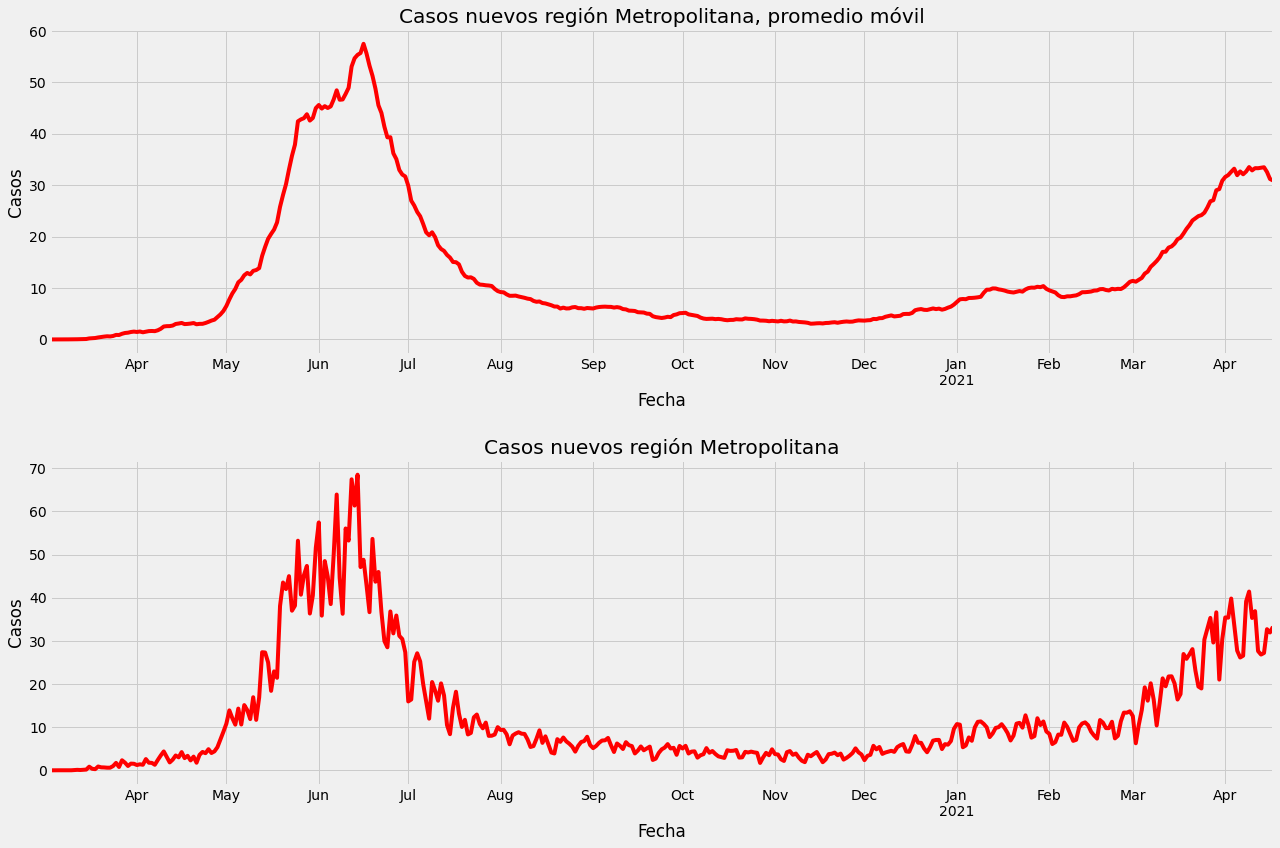

In [ ]:
from matplotlib import pyplot as plt


# Elegimos la región cuyos datos queremos filtrar
region = 'Metropolitana' 
# Buscamos los índices de las filas cuyo país es el elegido
Indices = data['Region']== region 
# Filtramos los datos con los índices encontrados
filtro_region = data[Indices] 
# Filtramos casos nuevos.
filtro_nuevos_totales = filtro_region [filtro_region['Categoria'] == 'Casos nuevos totales']
# Obtenemos los datos de la columan 'Total'
Nuevos_totales = filtro_nuevos_totales['Total']* 100_000 / poblacion[region] 

Tamano_ventana = 7    # Ventana de 7 días

# Calculamos promedio móvil con .rolling() y .mean()
# min_periods = 1 permite que calcule el promedio para ventanas más pequeñas como al inicio y al final.
Nuevos_movil = Nuevos_totales.rolling(window=7,min_periods = 1).mean()

# Graficamos
fig, ax  = plt.subplots(2,1,figsize=(18,12))

Nuevos_movil.plot(ax = ax[0], color = '#ff0000')
ax[0].set_title("Casos nuevos región "+region + ", promedio móvil")
ax[0].set_ylabel('Casos')
ax[0].set_xlabel('Fecha')

#Graficamos la comparación
Nuevos_totales.plot(ax = ax[1], color = '#ff0000')
ax[1].set_title("Casos nuevos región "+region)
ax[1].set_ylabel('Casos')
ax[1].set_xlabel('Fecha')

fig.tight_layout(h_pad = 2)
fig.show()

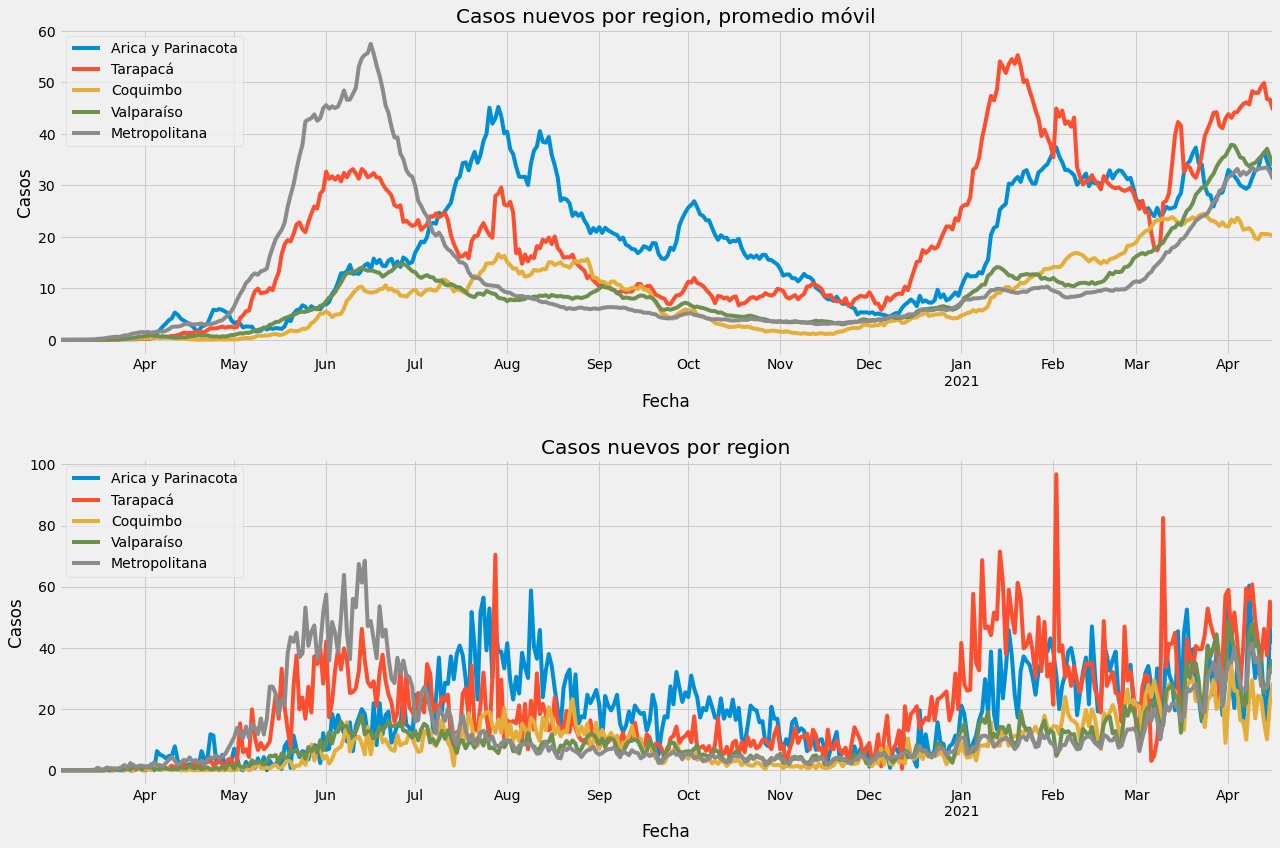

In [ ]:
from matplotlib import pyplot as plt

regiones = ('Valparaíso','Metropolitana', 'Maule', 'Los Ríos', 'Aysén')
fig, ax  = plt.subplots(2,1,figsize=(18,12))
for i in regiones:
  region = i 
  Indices = data['Region']== region 
  filtro_region = data[Indices] 
  filtro_nuevos_totales = filtro_region [filtro_region['Categoria'] == 'Casos nuevos totales']
  Nuevos_totales = filtro_nuevos_totales['Total']* 100_000 / poblacion[region] 

  Tamano_ventana = 7    # Ventana de 7 días

# Calculamos promedio móvil con .rolling() y .mean()
# min_periods = 1 permite que calcule el promedio para ventanas más pequeñas como al inicio y al final.
  Nuevos_movil = Nuevos_totales.rolling(window=7,min_periods = 1).mean()

  plt.style.use('fivethirtyeight')

  Nuevos_movil.plot(ax = ax[0],label=region)
  ax[0].set_title("Casos nuevos por region, promedio móvil")
  ax[0].set_ylabel('Casos')
  ax[0].set_xlabel('Fecha')

#Graficamos la comparación
  Nuevos_totales.plot(ax = ax[1],label=region)
  ax[1].set_title("Casos nuevos por region")
  ax[1].set_ylabel('Casos')
  ax[1].set_xlabel('Fecha')

ax[0].legend()
ax[1].legend()
fig.tight_layout(h_pad = 2)
fig.show()

##### En base a estos graficos y a los datos que obtubimos en base a la pregunta 3, podemos notar que la curva expuesta en los casos nuevos para un promedio movil es una curva más suave que la de casos nuevos, es decir, contiene menod puntas, pero en cuanto aa comportamiento de ambas curvas son bastante similares, la fecha del peak se produce al mismo tiempo en ambas curvas. 

Se suele utilizar más la curva de casos nuevos promedio movil pues suaviza la curva, resaltando de esta forma las tendencias. 

## Regresiones

El análisis de la regresión es un proceso estadístico para **estimar las relaciones entre variables**. Incluye muchas técnicas para el modelado y análisis de diversas variables, cuando la atención se centra en la **relación** entre **una variable dependiente** y **una o más variables independientes** (o predictoras).

Una regresión común es la **regresión lineal**.

$Y_{t}=\beta_{0}+\beta_{1} X_{1}+\beta_{2} X_{2}+\cdots+\beta_{p} X_{p}+\varepsilon$

donde $\epsilon$ es el error asociado a la medición, $X_i$ variables independientes y $\beta_i$parámetros de la regresión, para $i={1,...,N}$ con $N$ la cantidad de variables

Para el caso de **una** variable independiente tenemos una regresión en dos dimensiones como la de la siguiente figura.





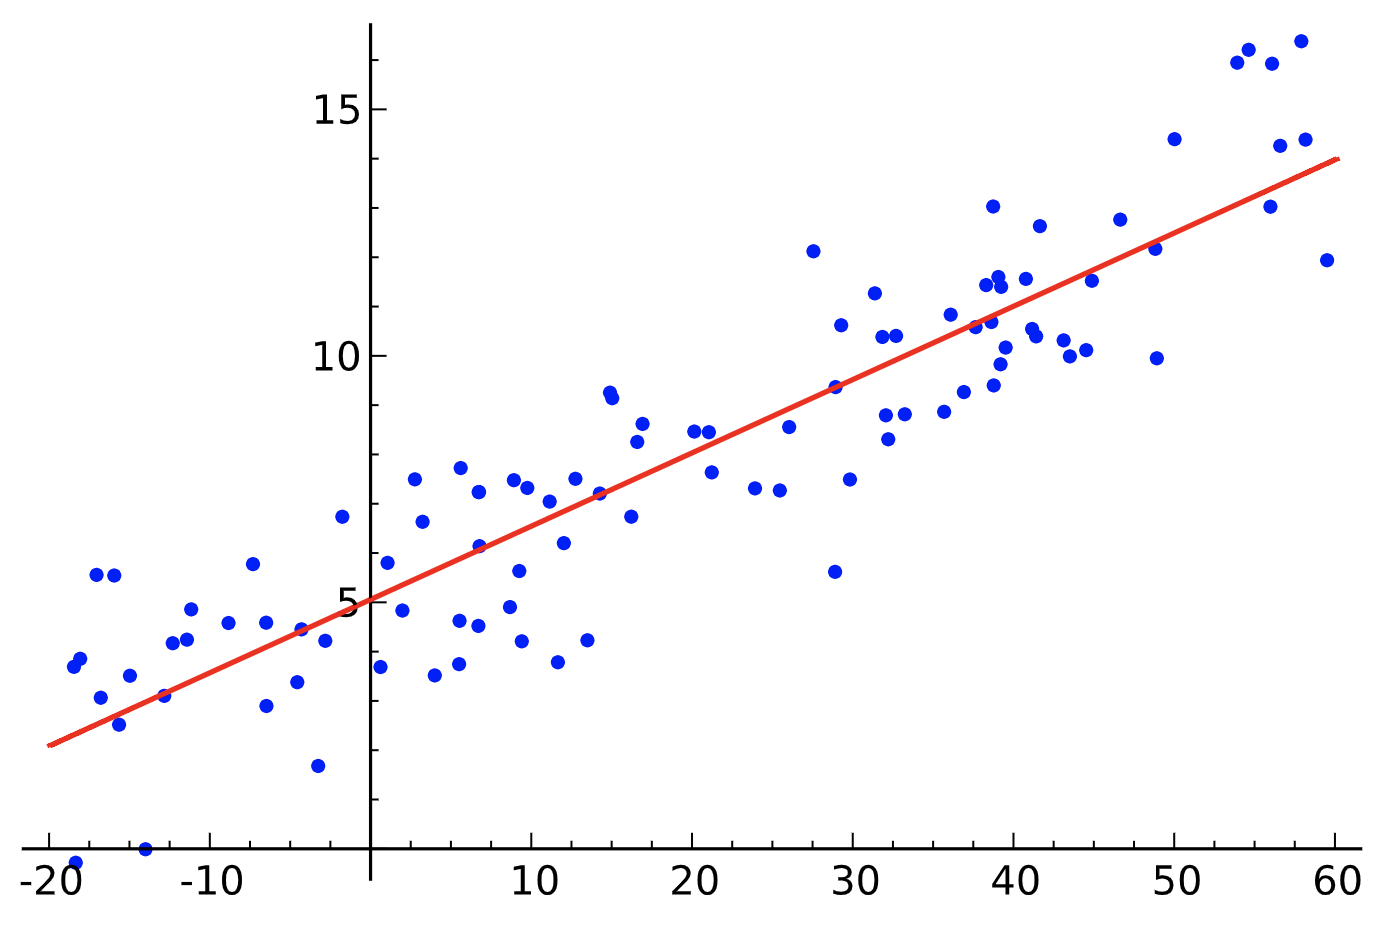

## Problema 5 (1 punto)

Ajuste una recta a los datos de casos acumulados, desde **inicios de 2021** de las 5 regiones.

* Para ajustar curvas a los datos usaremos [curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) de la librería **scipy**. Esta permite ajustar cualquier tipo de curva a los datos.


* Utilice **un gráfico para cada región**. Considere usar subfiguras.





**Código ejemplo**: Ajuste lineal de una región

In [ ]:
# Resetemos fechas como índices para obtener los datos de fechas, se ejecuta una vez
data = data.reset_index()

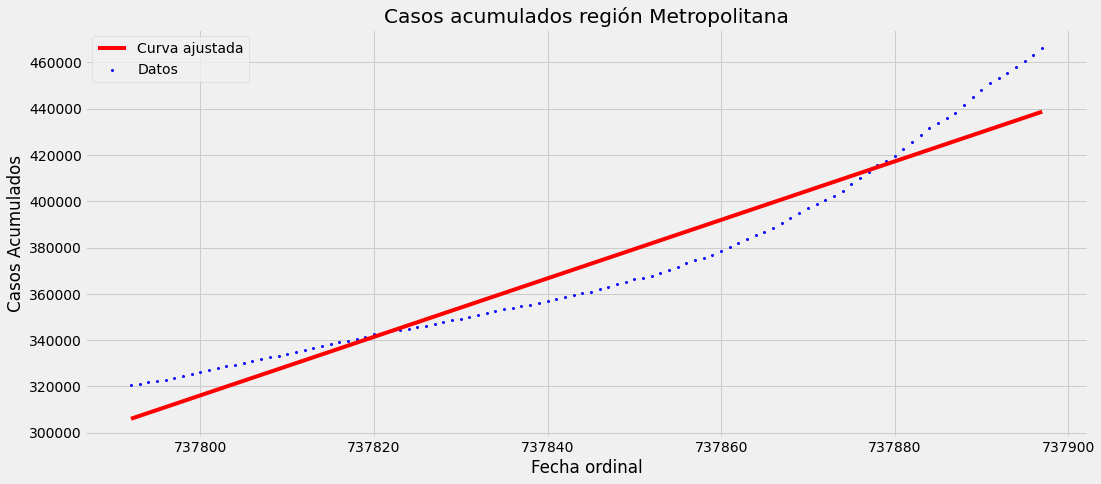

In [ ]:
import numpy as np
from scipy.optimize import curve_fit

import datetime as dt

Fecha_inicio = '01-01-2021'
start_datetime = dt.datetime.strptime(Fecha_inicio, '%d-%m-%Y').toordinal()


data['Fecha_ordinal'] = pd.to_datetime(data['Fecha']) # Retorna las fechas
data['Fecha_ordinal'] = data['Fecha_ordinal'].map(dt.datetime.toordinal) # Pasamos de fechas a números
data_2021 = data[data['Fecha_ordinal']>start_datetime] # Filtramos los datos de 2021


region = 'Metropolitana'
# Buscamos los índices de las filas cuyo país es el elegido
Indices = data_2021['Region']== region 
# Filtramos los datos con los índices encontrados
filtro_region = data_2021[Indices] 
# Filtramos casos aumulado y casos acumulados.
filtro_acumulado_totales = filtro_region[filtro_region['Categoria'] == 'Casos acumulados']
filtro_nuevos_totales = filtro_region [filtro_region['Categoria'] == 'Casos nuevos totales']
# Obtenemos los datos de la columna 'Total'
Acumulados_totales_x100mil = filtro_acumulado_totales['Total']


# Como variable independiente usamos los valores de las fechas
x = filtro_nuevos_totales['Fecha_ordinal'].values 
# Como variable independiente usamos los casos acumulados
y = Acumulados_totales_x100mil.values

# Ajuste lineal
# Definimos la función
def fit_func(x, a, b):
    return a*x + b

# Ajustamos la función a los datos con curve_fit
params = curve_fit(fit_func, x, y)
# Obtenemos los parámetros del ajuste
[a, b] = params[0]
# Realizamos nuestra predicción de los datos con la función y parámetros ajustados
y_pred = fit_func(x,a,b)


# Graficamos en mismo gráfico la nube de datos y el ajuste de curva

fig, ax  = plt.subplots(1,1,figsize = (16,7))

ax.plot(x,y_pred,color = 'r',label = 'Curva ajustada')   # plot para graficar curva ajustada
ax.scatter(x,y,color = 'b', linewidth = 2, s=1, label = 'Datos') # scatter para graficar nube de datos
ax.legend()
ax.set_title('Casos acumulados región ' + region)
ax.set_xlabel('Fecha ordinal')
ax.set_ylabel('Casos Acumulados')

fig.show()


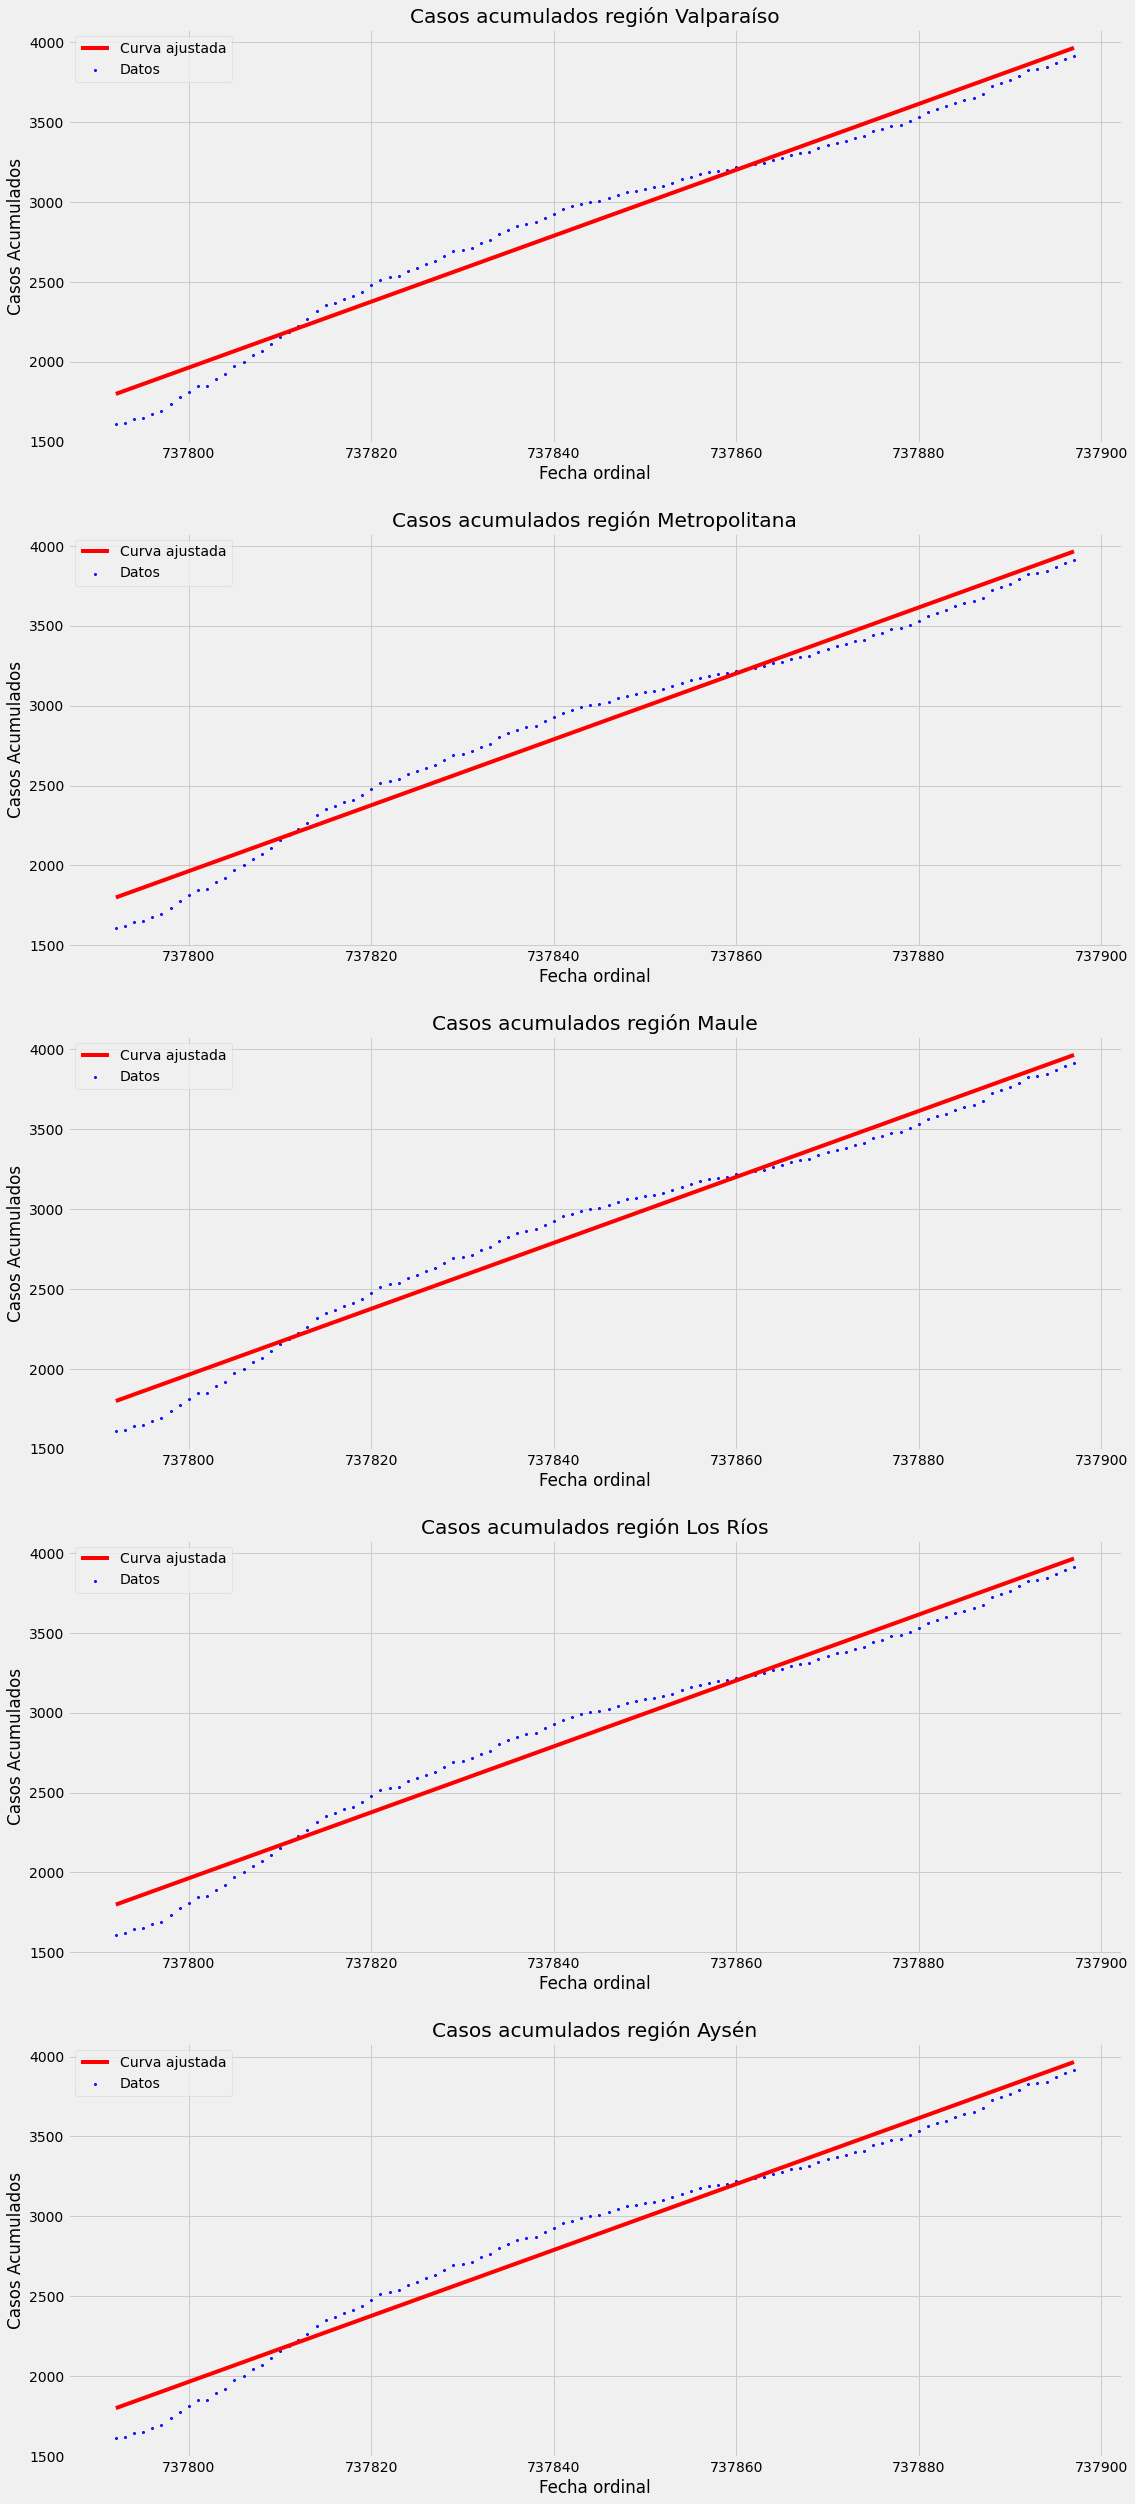

In [ ]:
import numpy as np
from scipy.optimize import curve_fit

import datetime as dt

Fecha_inicio = '01-01-2021'
start_datetime = dt.datetime.strptime(Fecha_inicio, '%d-%m-%Y').toordinal()


data['Fecha_ordinal'] = pd.to_datetime(data['Fecha']) # Retorna las fechas
data['Fecha_ordinal'] = data['Fecha_ordinal'].map(dt.datetime.toordinal) # Pasamos de fechas a números
data_2021 = data[data['Fecha_ordinal']>start_datetime] # Filtramos los datos de 2021

fig, ax  = plt.subplots(5,1,figsize = (16,35))

regiones = ('Valparaíso','Metropolitana', 'Maule', 'Los Ríos', 'Aysén')
for i in regiones:
    region = i
    Indices = data_2021['Region']== region 
    filtro_region = data_2021[Indices] 
    filtro_acumulado_totales = filtro_region[filtro_region['Categoria'] == 'Casos acumulados']
    filtro_nuevos_totales = filtro_region [filtro_region['Categoria'] == 'Casos nuevos totales']
    Acumulados_totales_x100mil = filtro_acumulado_totales['Total']


    x = filtro_nuevos_totales['Fecha_ordinal'].values 
    y = Acumulados_totales_x100mil.values


    def fit_func(x, a, b):
        return a*x + b

    params = curve_fit(fit_func, x, y)
    [a, b] = params[0]
    y_pred = fit_func(x,a,b)



for i in range(5):
    ax[i].plot(x,y_pred,color = 'r',label = 'Curva ajustada')   
    ax[i].scatter(x,y,color = 'b', linewidth = 2, s=1, label = 'Datos') 
    ax[i].legend()
    ax[i].set_title('Casos acumulados región ' + regiones[i])
    ax[i].set_xlabel('Fecha ordinal')
    ax[i].set_ylabel('Casos Acumulados')

fig.tight_layout(h_pad = 2)
fig.show()

### Bonus (3 décimas)

Para medir la calidad de la regresión existen distintos valores de rendimiento. Uno de ellos es el **error cuadrático medio** (ECM o MSE en inglés). Mide el **promedio de los errores al cuadrado**.

Para obtener el error en las unidades de lo que se mide se obtiene el RMSE (R de *root* o raíz) definiendo la métrica de error 

$\mathrm{RMSE}=\sqrt{\frac{\sum_{i=1}^{n}\left(\hat{Y}-Y\right)^{2}}{\mathrm{n}}}$

Donde $\hat{Y}$ es un vector de n predicciones y $Y$ es el vector de los verdaderos valores.

Calcule el RMSE de los ajustes de sus curvas en las 5 regiones y compare. 

In [ ]:
import math

def rmse(y_tongo, y):
  a=math.sqrt(sum((y_tongo-y)**2)/len(y_tongo))
  return a

import numpy as np
from scipy.optimize import curve_fit

import datetime as dt

Fecha_inicio = '01-01-2021'
start_datetime = dt.datetime.strptime(Fecha_inicio, '%d-%m-%Y').toordinal()


data['Fecha_ordinal'] = pd.to_datetime(data['Fecha']) # Retorna las fechas
data['Fecha_ordinal'] = data['Fecha_ordinal'].map(dt.datetime.toordinal) # Pasamos de fechas a números
data_2021 = data[data['Fecha_ordinal']>start_datetime] # Filtramos los datos de 2021

regiones = ('Valparaíso','Metropolitana', 'Maule', 'Los Ríos', 'Aysén')
for i in regiones:
    region = i
    Indices = data_2021['Region']== region 
    filtro_region = data_2021[Indices] 
    filtro_acumulado_totales = filtro_region[filtro_region['Categoria'] == 'Casos acumulados']
    filtro_nuevos_totales = filtro_region [filtro_region['Categoria'] == 'Casos nuevos totales']
    Acumulados_totales_x100mil = filtro_acumulado_totales['Total']


    x = filtro_nuevos_totales['Fecha_ordinal'].values 
    y = Acumulados_totales_x100mil.values


    def fit_func(x, a, b):
        return a*x + b

    params = curve_fit(fit_func, x, y)
    [a, b] = params[0]
    y_pred = fit_func(x,a,b)

    r=rmse(y_pred,y)
    print("El RMSE de la region "+region+" corresponde a",r)


El RMSE de la region Valparaíso corresponde a 2795.727412611451
El RMSE de la region Metropolitana corresponde a 10910.640388166119
El RMSE de la region Maule corresponde a 1172.1988812349787
El RMSE de la region Los Ríos corresponde a 612.6954178698271
El RMSE de la region Aysén corresponde a 101.58284811519175


A medida que el RMSE es menor, el ajuste es más afin de la realidad, ya que el RMSE corresponde al error cuadratico medio, por lo que a menor error, mejor ajuste. Por lo tanto, en base a los valores obtenidos el mejor ajuste ocurre en la región de Aysén donde el RMSE es igual a 101.58284811519175

# Consideraciones generales

Para la entrega de su tarea tengan en cuenta las siguientes consideraciones:



1. La entrega de la tarea se realiza por medio del buzón de tareas de Canvas. Deben cargar un archivo por pareja en el formato **Pareja_X_TareaFormativa1.ipynb** con **X** el número de la pareja. Quienes no respeten el formato tendrán un descuento de 5 décimas en la nota final.  

2. En la revisión se consideran descuentos por falta de ortografías o por falta de fuentes de información cuando utilicen datos no incluidos en las tareas o las clases. Con un link basta para citar.

3. El plazo de entrega es hasta el **jueves 22 de abril** a las **23:59 hrs**. Se considerarán descuentos de 0.5 puntos por cada hora o fracción de atraso en la entrega, sin excepciones. 